In [4]:
from nilearn import plotting
import pylab as plt
%matplotlib inline

import numpy as np
import nibabel as nb

In [ ]:
nb.
#press tab to see different functions
nb.Nifti1Image()
#Press shift + tab for info on what arguments it takes, press 2x for more info, pres 4x for the documentation to open in a window in notebook



# Load a NIFTI file and look at the header:
    

In [6]:
img = nb.load('F://openNeuro//data//data//sub-01//anat//sub-01_T1w.nii.gz')
print(img)



<class 'nibabel.nifti1.Nifti1Image'>
data shape (224, 256, 256)
affine: 
[[ 7.80000031e-01  0.00000000e+00  0.00000000e+00 -8.69700012e+01]
 [ 0.00000000e+00  7.78157055e-01 -6.94487095e-02 -9.20152588e+01]
 [ 0.00000000e+00  6.94487095e-02  7.78157055e-01 -1.01384445e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 224 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.         0.78000003 0.78125    0.78125    1.63       0.
 0.         0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10


### We can see it is a 3d file, not 4d because it gives us voxels x voxels x voxels (in data shape)
#### It is only one volume because it is anatomical, not functional

#### So let's look at a functional image as comparison:

In [8]:
imgFunc = nb.load("F://openNeuro//data//data//sub-01//func//sub-01_task-antisaccadetaskwithfixedorder_run-01_bold.nii.gz")

print(imgFunc)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (64, 64, 29, 216)
affine: 
[[ -3.125        0.           0.         100.        ]
 [  0.           3.125        0.         -97.41625977]
 [  0.           0.           4.         -51.94065857]
 [  0.           0.           0.           1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b'?TR:1500.000 TE:25'
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  64  64  29 216   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.     3.125  3.125  4.     1.5    1.     1.     1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_durat

#### Now we can see there are four dimensions, the last dimension represents volumes, or time


In [18]:
data = imgFunc.get_data()
data

affine = imgFunc.affine
affine
#view the affine transformation
#how we translate from 4d array to a physical space representation


C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


array([[ -3.125     ,   0.        ,   0.        , 100.        ],
       [  0.        ,   3.125     ,   0.        , -97.41625977],
       [  0.        ,   0.        ,   4.        , -51.94065857],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

In [ ]:
header = imgFunc.header['pixdim']
header
#get the pixel dimensions 
#in this image, we have voxel size of 3.125, 3.125, 4 millimeters
#with a TR (time of repetition{how much time in seconds it takes between collecting volumes}) of 1.5

Aside
Why not just img.data? Working with neuroimages can use a lot of memory, so nibabel works hard to be memory efficient. If it can read some data while leaving the rest on disk, it will. img.get_data() reflects that it's doing some work behind the scenes.


## Let's visualize the data
### We can take slices of the data

plt.imshow() is a function from matplotlib that lets us visualize data 
[:, :,  -- means we're going to look at all of the "i's" and all of the "j's" 
data.shape[2] // 2 means we're getting it from somewhere in the middle of the brain
0 means we're selecting the first volume

When we do data.shape, we see the shape that we saw earlier, with the x, y, z, volumes data
So when we take the index [2] of that shape, we are using the third coordinate (z)
And then we're dividing it by 2-- // 2 -- to get an integer value in the middle of the brain 

(64, 64, 29, 216)


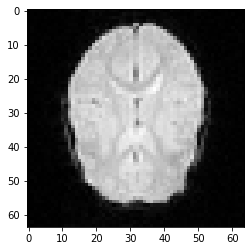

In [19]:
plt.imshow(data[:, :, data.shape[2] // 2, 0].T, cmap='Greys_r')
print(data.shape)

### img.orthoview()

Nibabel has its own viewer, which can be accessed through img.orthoview(). This viewer scales voxels to reflect their size, and labels orientations.



<IPython.core.display.Javascript object>


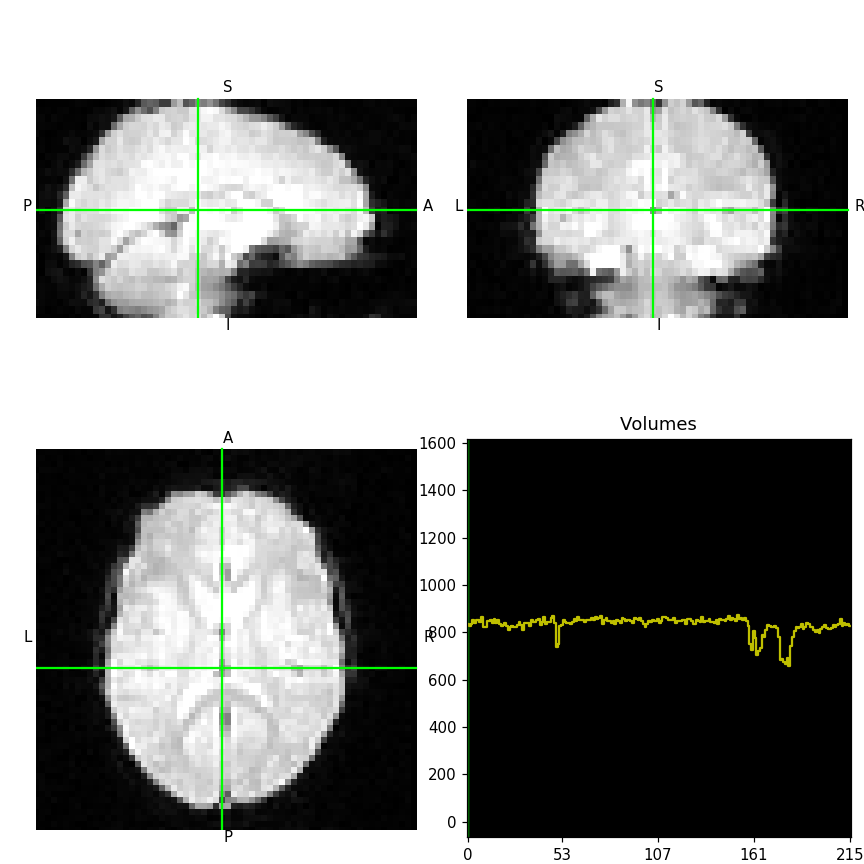

<OrthoSlicer3D: F://openNeuro//data//data//sub-01//func//sub-01_task-antisaccadetaskwithfixedorder_run-01_bold.nii.gz (64, 64, 29, 216)>

In [21]:
%matplotlib notebook
imgFunc.orthoview()

## Affine
The affine is a 4 x 4 numpy array. This describes the transformation from the voxel space (indices [i, j, k]) to the reference space (distance in mm (x, y, z)).
Allows us to transform between the i, j, k (the numerical representations of each voxel, without knowing anything about location) and the affine helps transform that to a physical space to let us know where the brain is located in space

It can be used, for instance, to discover the voxel that contains the origin of the image:

In [22]:
x, y, z, _ = np.linalg.pinv(affine).dot(np.array([0, 0, 0, 1])).astype(int)

print("Affine:")
print(affine)
print
print("Center: ({:d}, {:d}, {:d})".format(x, y, z))

Affine:
[[ -3.125        0.           0.         100.        ]
 [  0.           3.125        0.         -97.41625977]
 [  0.           0.           4.         -51.94065857]
 [  0.           0.           0.           1.        ]]
Center: (32, 31, 12)


In [23]:
nb.aff2axcodes(affine)


('L', 'A', 'S')

### The affine also can tell us orientation of the image ^ as well as voxel size

In [28]:
nb.affines.voxel_sizes(affine)

array([3.125, 3.125, 4.   ])

### Header
The header is a nibabel structure that stores all of the metadata of the image. You can query it directly, if necessary:

In [32]:
imgFunc.header['descrip']

array(b'', dtype='|S80')

But it also provides interfaces for the more common information, such as get_zooms, get_xyzt_units, get_qform, get_sform).



In [35]:
imgFunc.header.get_zooms()

(3.125, 3.125, 4.0, 1.5)

In [36]:
imgFunc.header.get_xyzt_units()


('mm', 'sec')

In [37]:
imgFunc.header.get_qform()


array([[ -3.125     ,   0.        ,   0.        , 100.        ],
       [  0.        ,   3.125     ,   0.        , -97.41625977],
       [  0.        ,   0.        ,   4.        , -51.94065857],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

In [38]:
imgFunc.header.get_sform()

array([[ -3.125     ,   0.        ,   0.        , 100.        ],
       [  0.        ,   3.125     ,   0.        , -97.41625977],
       [  0.        ,   0.        ,   4.        , -51.94065857],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

Normally, we're not particularly interested in the header or the affine. But it's important to know they're there. And especially, to remember to copy them when making new images, so that derivatives stay aligned with the original image.

## Creating and saving images
Suppose we want to save space by rescaling our image to a smaller datatype, such as an unsigned byte. To do this, we first need to take the data, change its datatype and save this new data in a new NIfTI image with the same header and affine as the original image.

In [40]:
imgFunc = nb.load('F://openNeuro//data//data//sub-01//func//sub-01_task-antisaccadetaskwithfixedorder_run-01_bold.nii.gz')
data = imgFunc.get_data()

C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


In [41]:
# Now we force the values to be between 0 and 255
# and change the datatype to unsigned 8-bit
rescaled = ((data - data.min()) * 255. / (data.max() - data.min())).astype(np.uint8)

In [43]:
# Now we can save the changed data into a new NIfTI file
new_img = nb.Nifti1Image(rescaled, affine=img.affine, header=img.header)
nb.save(new_img, 'F://openNeuro//data//data//sub-01//func//rescaled_image.nii.gz')

In [44]:
print((new_img.get_data().dtype, new_img.get_data_dtype()))


(dtype('uint8'), dtype('<f4'))


C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


In [46]:
img.set_data_dtype(np.uint8)


In [47]:
# Save image again
new_img = nb.Nifti1Image(rescaled, affine=img.affine, header=img.header)
nb.save(new_img, 'F://openNeuro//data//data//sub-01//func//rescaled_image.nii.gz')
print((new_img.get_data().dtype, new_img.get_data_dtype()))

(dtype('uint8'), dtype('uint8'))


C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.
